# Linear Regression

Training a linear regression model means finding the set of parameters $\beta_1, \dots, \beta_p$ that minimize the $MSE$. In machine learning, the function that we want to minimize is usually called **cost** function.

Consider these two approaches to train a Linear Regression model.

1. **Analytical solution** --- This method gives a closed-form solution to compute the optimal weights ($\beta$'s) for the regression line.
2. **Gradient descent** --- This method is an iterative optimization techniques that starts with some initial guess of the weights vector $\beta$ and it updates it in order to minimize the cost function.

In [1]:
import matplotlib.pyplot as plt

#### 1) Generate Synthetic Dataset

Started by generating some synthetic data set. In this problem, assume that the regression model has only one predictor and writes

 $$f(X_1) = \beta_0 + \beta_1 X_1,$$

where $\beta_0 = 4$ and $\beta_1 = 3$.

Also, assume that
- The predictor $X_1$ follows a uniform distribution between 0 and 2, i.e., $X_1 \sim U[0, 2]$,
- The response $Y = f(X_1)+ N(0, 1) = 4 + 3 X_1 + N(0, 1)$, where $N(0, 1)$ denotes a standard normal random variable.

In [2]:
# Libraries
import numpy as np

In [3]:
n = 100 # Observations
X1 = 2 * np.random.rand(n, 1) # Creates a column vector with n rows and 1 column, and generates values using rand(). When *2, makes it uniform.
#X1 = np.random.uniform(low = 0, high = 2, size = (n,1)) ... This code does the same thing, loc = location of mean
X1.shape # Dimensions of Panda/NumPy type objects

(100, 1)

In [4]:
Y = 4 + 3 * X1 + np.random.rand(n, 1)  # Creates a column vector with n rows and 1 column
#Y = 4 + 3 * X1 + np.random.normal(loc = 0, scale = 1, size = (n, 1)) ... This code does the same thing, loc = location of mean
Y.shape # Dimensions of Panda/NumPy type objects

(100, 1)

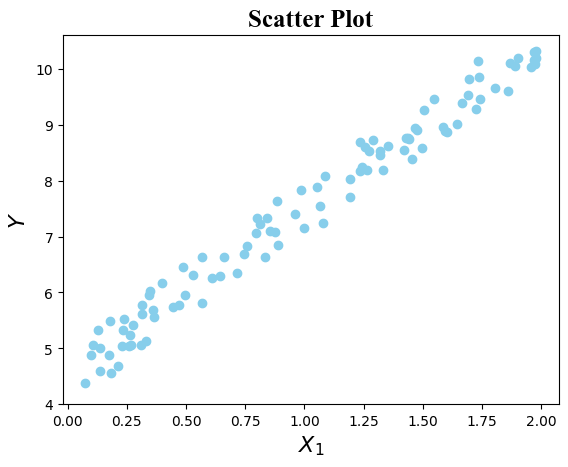

In [5]:
plt.scatter(X1, Y, color = 'skyblue'); # 'k' = black
#plt.plot (line plot)
plt.title("Scatter Plot", fontsize = 18, fontweight = "bold", fontname = "Times New Roman") # Plot title
plt.xlabel("$X_1$", fontsize = 16, fontname = "Times New Roman"); # x-axis label
plt.ylabel("$Y$", fontsize = 16, fontname = "Times New Roman"); # y-axis label
plt.ylim(bottom = 4); # Minimum of y-axis

#### 2) Train Linear Regression with Analytical Solution

Denote by $X$ the matrix containing the predictor values. In this case, the first column of $X$ contains all 1's (for the intercept) and the second column contains the predictor $X_1$.

The optimal vector $\beta^* = (\beta_0^*, \beta_1^*)$ that minimizes the cost function $MSE(\beta_0, \beta_1)$, is given by

$$\beta^* = (X^T X)^{-1} X^T Y.$$

In [6]:
ones = np.ones(shape = (n, 1)) # Creates a numpry array of shape (n, 1) where all elements are 1
X = np.column_stack([ones, X1]) # Creates 2-D array, first column is all ones and the second are the random numbers generated before [X1 = 2 * np.random.rand(n, 1)]
X.shape # Dimensions of Panda/NumPy type objects
# np.column_stack(): used to stack or arrange 1-D input arrays as columns into a 2-D array
#  Vector always has one column (n * 1) --> (rows * 1)

(100, 2)

In [7]:
# beta_opt = np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), Y)) ... more complex version
beta_opt = np.linalg.inv(X.T @ X) @ (X.T @ Y) # Generated by using the formula from above

# np.linalg.inv(): Computes the inverse of a matrix.
#  @: Matrix multiplication operator
#   .T means that the transpose operation is performed using the dot product

beta_opt # Optimal values (weights) of the coefficients for the linear regression model

array([[4.58590649],
       [2.8931343 ]])

In [8]:
beta_opt[0] # Multiply value with the ones

array([4.58590649])

In [9]:
beta_opt[1] # Multiply value with the X1s

array([2.8931343])

In [10]:
# These are two ways to find y_hat!
ones * beta_opt[0] + X1 * beta_opt[1] # Combine the columns together from X
Y_hat = X @ beta_opt # Computed from the formula above, X has two columns

#### 3) Plot the Predictions

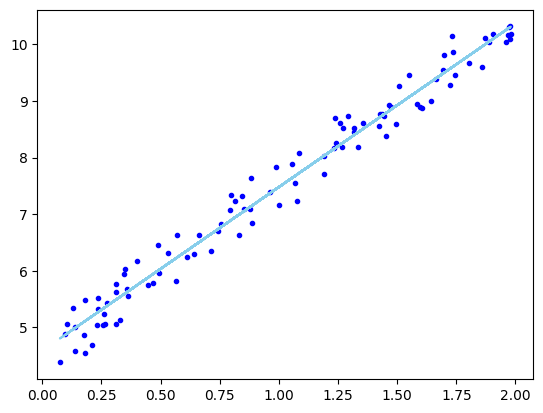

In [11]:
plt.plot(X1, Y, "b."); # Generated random data (original)
plt.plot(X1, Y_hat, "skyblue"); # Generated predictions (Y_hat values)

#### 4) Compare Solutions with scikitlearn

In [12]:
from sklearn.linear_model import LinearRegression # Just a class, fitting and prediction. First create an instance

In [13]:
# Need to fit to the data
# Implicit intercept:
lin_reg = LinearRegression() # Equivalent to: lin_reg = LinearRegression(fit_intercept = True)
# Create an instance to fit on training, predict on new, and evaluate the performance of the model
lin_reg.fit(X1, Y)
# y-intercept will be determined by the line of best fit

# Explicit intercept in X:
lin_reg2 = LinearRegression(fit_intercept = False) # Sets y-intercept to 0
lin_reg2.fit(X, Y)

# No intercept (wrong!):
lin_reg_wrong = LinearRegression(fit_intercept = False) # Sets y-intercept to 0
lin_reg_wrong.fit(X1, Y)

# Double intercept (wrong!):
lin_reg_double = LinearRegression()
lin_reg_double.fit(X, Y)

LinearRegression()

In [14]:
print(lin_reg.intercept_) # Shows the point where the estimated regression line crosses the 𝑦 axis
print(lin_reg.coef_) # Contains the coefficients for the prediction of each of the targets

[4.58590649]
[[2.8931343]]


In [15]:
print(lin_reg2.intercept_) # Shows the point where the estimated regression line crosses the 𝑦 axis
print(lin_reg2.coef_) # Contains the coefficients for the prediction of each of the targets

0.0
[[4.58590649 2.8931343 ]]


In [16]:
print(lin_reg_wrong.intercept_) # Shows the point where the estimated regression line crosses the 𝑦 axis
print(lin_reg_wrong.coef_) # Contains the coefficients for the prediction of each of the targets

0.0
[[6.28800113]]


In [17]:
print(lin_reg_double.intercept_) # Shows the point where the estimated regression line crosses the 𝑦 axis
print(lin_reg_double.coef_) # Contains the coefficients for the prediction of each of the targets

[4.58590649]
[[0.        2.8931343]]


In [18]:
beta_opt - lin_reg2.coef_.T

array([[ 9.76996262e-15],
       [-4.44089210e-15]])

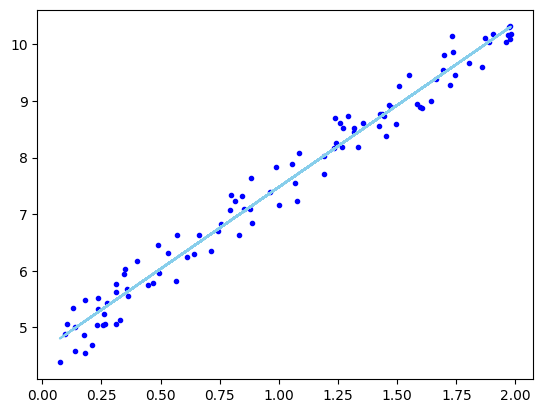

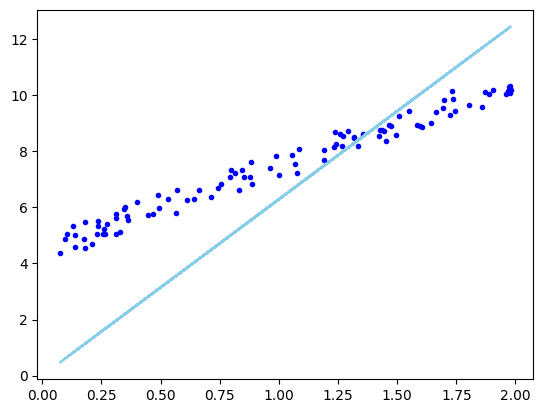

In [19]:
Y_hat1 = lin_reg.predict(X1) # Linear regression model,
plt.plot(X1, Y, 'b.') # Plot the original/true values
plt.plot(X1, Y_hat1, 'skyblue') # Plot the predicted values
plt.show()

Y_hat_wrong = lin_reg_wrong.predict(X1)
plt.plot(X1, Y, 'b.')
plt.plot(X1, Y_hat_wrong, 'skyblue')
plt.show()

In [20]:
beta_opt[0] - lin_reg.intercept_ # Close to 0
beta_opt[1] - lin_reg.coef_ # Close to 0

array([[-6.21724894e-15]])

#### 5) Train Linear Regression with Batch Gradient Descent

The general idea of gradient descent is to update the parameters iteratively to minimize the cost function.

**Note**: When using gradient descent, it is always better have all features on the same scale. This can be done in the data transformation step using the `StandardScaler` class from `sklearn.preprocessing`.
This ensures that the algorithm converges to the optimal solution much faster.

The cost function is

$$MSE(\beta_0, \beta_1) = \frac{1}{n}\sum_{i = 1}^{n}(Y_i -\beta_0 - \beta_1 X_{i1})^2.$$

The idea of gradient descent is to start with some initial guess of the vector $\beta = (\beta_0, \beta_1)$, and iteratively update it in the direction that points "most **downhill**" (remember that you want to **minimize** the cost function).

The **gradient vector** of the MSE is denoted as

$$ \nabla MSE(\beta) = \begin{bmatrix}
           \dfrac{\partial MSE(\beta)}{\partial \beta_0} \\
           \dfrac{\partial MSE(\beta)}{\partial \beta_1}
         \end{bmatrix},$$

where each element is the partial derivative of the $MSE$ with respect to $\beta_1$ and $\beta_2$.

Notice that the **gradient vector of any cost function** gives us the direction that points "most **uphill**".
Since the **gradient** vector points toward the most **uphill** direction, then the **negative gradient** points toward the most **downhill** direction.

In linear regression with the $MSE$ cost function, the **negative gradient** vector writes

$$ -\nabla MSE(\beta) = -\frac{2}{n} X^T (X\beta - Y).$$

Based on the negative gradient vector, at each iteration, it updates the previous parameter value $\beta_{\text{old}}$, as follows

$$ \beta_{\text{new}} = \beta_{\text{old}} - \alpha\ \nabla MSE(\beta_{\text{old}}),$$

where $\alpha$ is the learning rate, a **crucial** tuning parameter for the algorithm.

* We now implement the batch gradient descent algorithm. Fill in the `??`. Which value of `beta` do you obtain? What happens if you change `alpha`?

In [21]:
alpha = 0.1 # Learning rate parameter
n_iterations = 1000 # Number of iterations

beta = np.random.rand(2, 1) # Randomly initialize a 2=x1 array of random numbers

for i in range(n_iterations): # Loops through the 1000 iterations
    gradient = 2 / n * X.T @ (X @ beta - Y) # Negative gradient vector formula from above
    beta = beta - alpha * gradient # Beta_new formula from above
    # The negative is represented in the beta MINUS alpha, which would be the same as doing (-2/n)... beta + alpha

print("Final:", beta)
#-2.5e+117 = -2.5 * (10 ** (117)) = -2.5 * (1000000000000000)

Final: [[4.58590649]
 [2.8931343 ]]


In [22]:
beta_opt

array([[4.58590649],
       [2.8931343 ]])

In [25]:
def plot_batch_gradient_descent(X, Y, alpha = 0.1, n_iterations = 100, seed = 42):
    '''
    numpy.ndarray numpy.ndarray float float float -> list
    produces a list with the updates of the parameter vector
    as a side effect, it plots the first 100 updates of the regression function
    '''

    # Remember dimension info of X
    nRows, nCols = X.shape # nRows is the count of how many there are

    # Start with a random beta
    np.random.seed(seed) # Same every time you call the function
    beta = np.random.rand(nCols, 1) # Randomly initialize the parameter vector

    # Initialize beta history with this beta
    beta_path = [] # Empty list
    beta_path.append(beta) # Append beta to the empty list

    # Plot Y and second column of X
    plt.plot(X[:,1], Y, "b.")

    for i in range(n_iterations): # Loops through the # iterations
        gradient = 2 / n * X.T @ (X @ beta - Y) # Negative gradient vector formula from above
        beta = beta - alpha * gradient # Beta_new formula from above
        beta_path.append(beta) # Append beta to the empty list

        if (i < 100): # Choose # of i's that are plotted
            plt.plot(X[:, 1], X @ beta, "skyblue") # Plot Y (X @ beta) and second column of X

    return(np.array(beta_path))


array([[4.53009628],
       [2.94011498]])

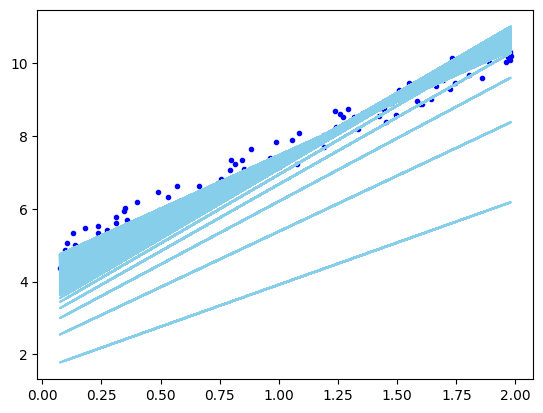

In [26]:
path_batch = plot_batch_gradient_descent(X, Y, alpha = 0.1)
path_batch[-1] # Displays the last value of the list of arrays

#### 6) Train Linear Regression with Stochastic Gradient Descent

The gradient descent scheme that above is known as **batch** gradient descent. This is because at every step it uses **all** the training data to update the gradient vector and the parameter vector $\beta$.
This makes it very slow when the training dataset contains many observations.

At the other end of the spectrum, there is **stochastic** gradient descent. Here, at every step, it randomly choose one random observation (row) from the dataset to update the gradient vector and the parameter vector $\beta$. In other words, the updates at every step depend only on a single observation.

This makes the algorithm much faster to compute each iteration, compared to the batch version. On the other hand, since the updates depend on a single observation, this algorithm is more "erratic" than the batch version, and it will never settles at the minimum point, unless you "stop it".

In the stochastic gradient descent, it is important to have a learning rate $\alpha$ that slowly decays to zero, as the number of iterations increases. One common choice is to define the learning rate as follows

$$\alpha(t) = \dfrac{\eta_0}{t^{k}}$$

where $t$ denotes the number of iterations, and $\eta_0$ and $k$ are hyperparameters. The defaults values in `scikit-learn` are $\eta_0 = 0.01$ and $k = 0.25$.

In [27]:
from sklearn.linear_model import SGDRegressor

In [28]:
# A linear regression model using stochastic gradient descent (SGD) as the optimization algorithm.
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, eta0 = 0.1, penalty = None)
# max_iter: The maximum number of iterations to run the SGD algorithm
#  tol: Tolerance for the stopping criterion, which is used to determine when to stop iterating
#   eta0: Initial learning rate for the SGD algorithm
#     penalty: The regularization term to apply to the model

In [29]:
sgd_reg.fit(X1, Y.ravel()) # Convert a multi-dimensional array into one-dimensional array
Y.shape

(100, 1)

In [30]:
print("beta_0:", sgd_reg.intercept_[0])
print("beta_1:", sgd_reg.coef_[0])

beta_0: 4.587166503778629
beta_1: 2.8933927648470115


#### 7) Plot the Downhill Path of Batch and Stochastic Gradient Descent

In [31]:
def plot_stochastic_gradient_descent(X, Y, eta0 = 0.1, n_iterations = 100, seed = 42):
    '''
    numpy.ndarray numpy.ndarray float float float -> list
    produces a list with the updates of the parameter vector
    as a side effect, it plots the first 10 updates of the regression function
    '''

     # Plot the data points
    plt.plot(X[:,1], Y, "b.")

    # Remember dimension info of X
    nRows, nCols = X.shape

    # Start with a random beta
    np.random.seed(seed)
    beta = np.random.rand(nCols, 1) # Intialize parameter

    # Initialize beta history with this beta
    beta_path = []
    beta_path.append(beta)

    # In each iteration, loop once for each row
    for i in range(n_iterations):
        for j in range(nRows):

            # Extract a random row of X and the corresopnding entry of Y
            random_row = np.random.randint(nRows)
            Xj = X[random_row:random_row+1]
            Yj = Y[random_row:random_row+1]
            # Note: X[random_row:random_row+1] is different from X[random_row] (check Xj.shape)!

            # Update the learning rate
            alpha = eta0 / (j + i * nRows + 1)**0.25 # Update learning rate

            # Update beta (as in batch gradient descent)
            gradient = 2 * Xj.T @ (Xj @ beta - Yj) # Compute gradient
            beta = beta - alpha * gradient # Update beta
            beta_path.append(beta)

            # Plot regression if we are in the first 10 iterations
            if (i == 0 and j < 10):
                plt.plot(X[:, 1], X @ beta, "skyblue")

    return(np.array(beta_path))

array([[[0.37454012],
        [0.95071431]],

       [[1.54143323],
        [2.20841555]],

       [[2.16861754],
        [2.81179697]],

       ...,

       [[4.60540473],
        [2.88403556]],

       [[4.60434702],
        [2.88324976]],

       [[4.59908985],
        [2.87623677]]])

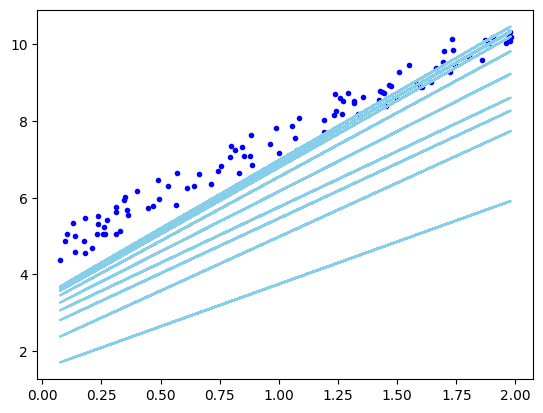

In [32]:
path_stoch = plot_stochastic_gradient_descent(X, Y);
path_stoch

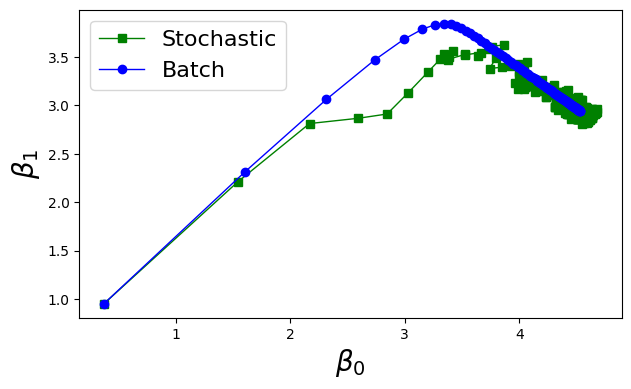

In [33]:
begin = 0 # Starting points of plotted data
end = 500 # Ending points of plotted data
plt.figure(figsize = (7,4)) # Figure dimensions
plt.plot(path_stoch[begin:end, 0], path_stoch[begin:end, 1], "g-s", linewidth = 1, label = "Stochastic") # 1 corresponds to the x-axis values and 0 is for the y-axis
plt.plot(path_batch[begin:end, 0], path_batch[begin:end, 1], "b-o", linewidth = 1, label = "Batch") # 1 corresponds to the x-axis values and 0 is for the y-axis
plt.legend(loc = "upper left", fontsize = 16) # Legend label
plt.xlabel("$\\beta_0$", fontsize = 20) # x-axis label
plt.ylabel("$\\beta_1$", fontsize = 20); # y-axis label